In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.optimize import curve_fit
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html

In [3]:
data = pd.read_csv("cleanData.csv",index_col=0)

In [5]:
series = data.columns

Index(['Date', 'AAPL', 'AMZN', 'FSPTX', 'SHRAX', 'SPY'], dtype='object')

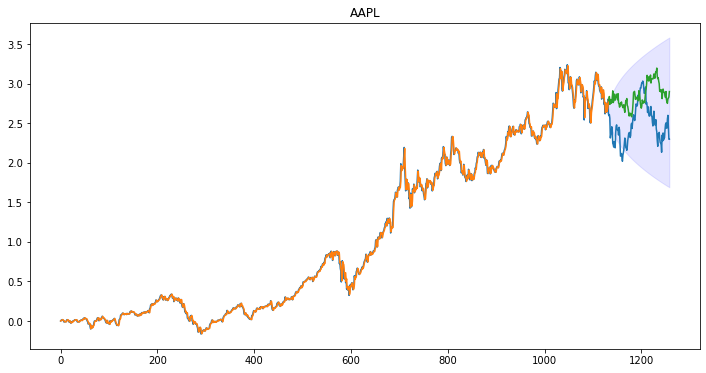

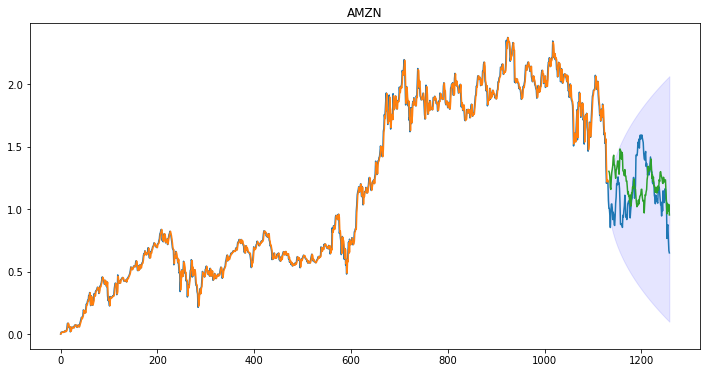

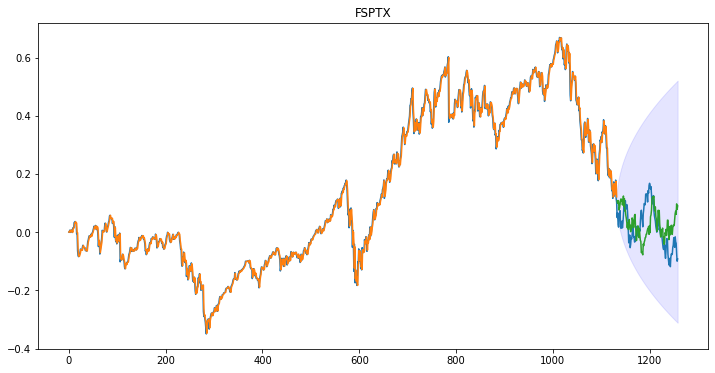

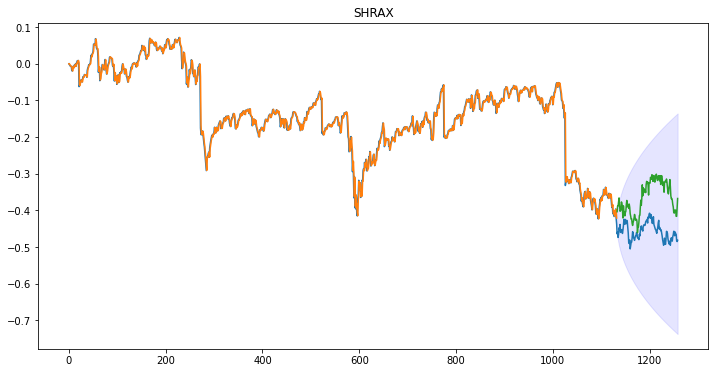

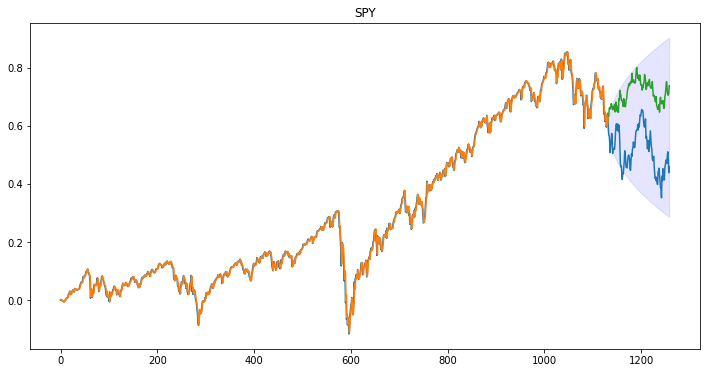

In [37]:
for i in range(1,len(series)):
    
    thisSeries = data[series[i]]
    t = np.arange(0,len(thisSeries),1)

    trainX = t[:int(.9*len(thisSeries))]
    testX = t[int(.9*len(thisSeries)):]

    trainY = thisSeries[:int(.9*len(thisSeries))]
    testY = thisSeries[int(.9*len(thisSeries)):]

    fit = ExponentialSmoothing(trainY).fit(disp=0)

    simulation = fit.simulate(len(testX)) + fit.fittedvalues.iloc[-1] 
    forecast = fit.get_forecast(len(testX)).summary_frame()

    plt.figure(figsize = (12,6))

    plt.plot(t,thisSeries)
    plt.plot(trainX,fit.fittedvalues)
    plt.plot(testX,simulation)
    plt.fill_between(testX,(forecast['mean_ci_lower']), (forecast['mean_ci_upper']), color='b', alpha=.1)
    plt.title(series[i]);
